In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_restaurant_inspection_data_3.csv') 
df.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,ACTION,VIOLATION CODE,...,Census Tract,BIN,BBL,NTA,Location,days_since_last,avg_last_3_scores,inspection_year,inspection_month,inspection_weekday
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,Bakery Products/Desserts,Establishment Closed by DOHMH. Violations were...,06D,...,25200.0,2045445.0,2.041270e+09,BX37,POINT (-73.855971889932 40.848231224526),730.0,25.02185,2023,1,1
1,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,Bakery Products/Desserts,Establishment Closed by DOHMH. Violations were...,08C,...,25200.0,2045445.0,2.041270e+09,BX37,POINT (-73.855971889932 40.848231224526),0.0,21.00000,2023,1,1
2,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,Bakery Products/Desserts,Establishment Closed by DOHMH. Violations were...,04L,...,25200.0,2045445.0,2.041270e+09,BX37,POINT (-73.855971889932 40.848231224526),0.0,21.00000,2023,1,1


### 1. Grade & Score Analysis

Show the distribution of scores and how this distribution corresponds to the A/B/C grades in reality.

**Business Background:** The NYC Department of Health stipulates that: (The lower the score, the better)

0-13 points = A

14-27 points = B

Greater than or equal to 28 points = C

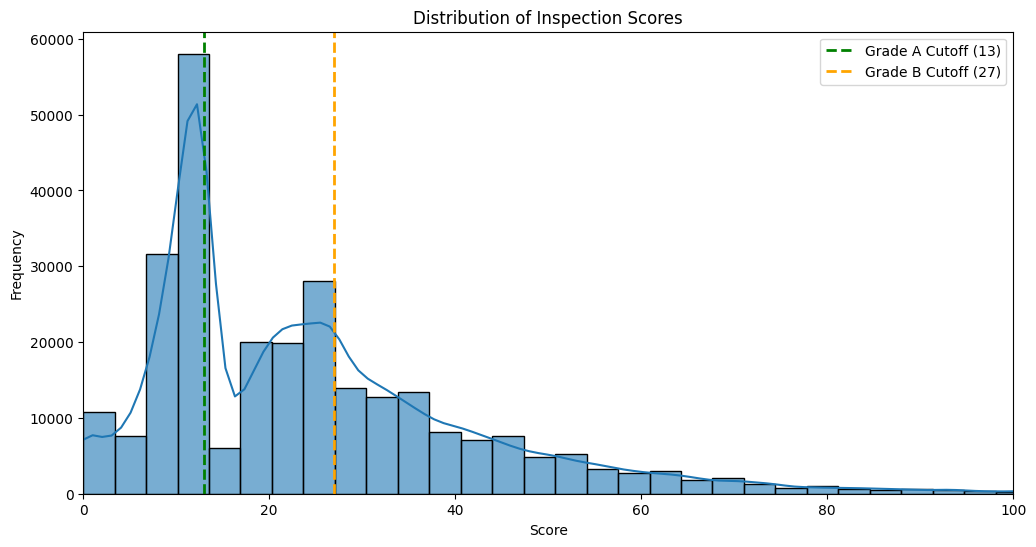

In [3]:
plt.figure(figsize=(12, 6))
sns.histplot(df['SCORE'], bins=60, kde=True, alpha=0.6)

plt.axvline(x=13, color='green', linestyle='--', linewidth=2, label='Grade A Cutoff (13)')
plt.axvline(x=27, color='orange', linestyle='--', linewidth=2, label='Grade B Cutoff (27)')

plt.title('Distribution of Inspection Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 100) 
plt.show()

### 2. Cuisine Risk Analysis

We can identify which cuisines generally have poorer hygiene conditions and which ones are the best.

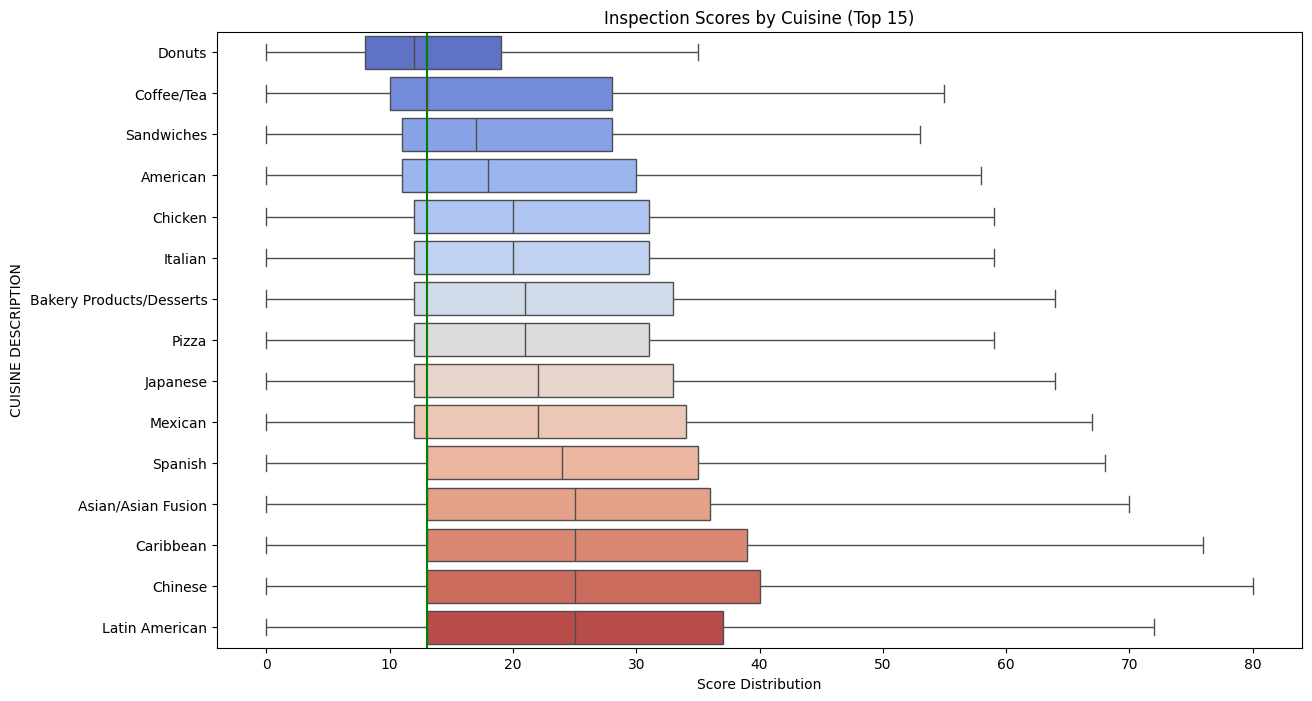

In [4]:
# Screen out the top 15 cuisines with the largest number to avoid interference from small samples
top_cuisines = df['CUISINE DESCRIPTION'].value_counts().nlargest(15).index
df_top = df[df['CUISINE DESCRIPTION'].isin(top_cuisines)]

order = df_top.groupby('CUISINE DESCRIPTION')['SCORE'].median().sort_values().index

plt.figure(figsize=(14, 8))
sns.boxplot(x='SCORE', y='CUISINE DESCRIPTION', data=df_top, order=order, showfliers=False, palette="coolwarm")
plt.title('Inspection Scores by Cuisine (Top 15)')
plt.xlabel('Score Distribution')
plt.axvline(x=13, color='green') # Grade A reference line
plt.show()

### 3. Feature Correlation Heatmap

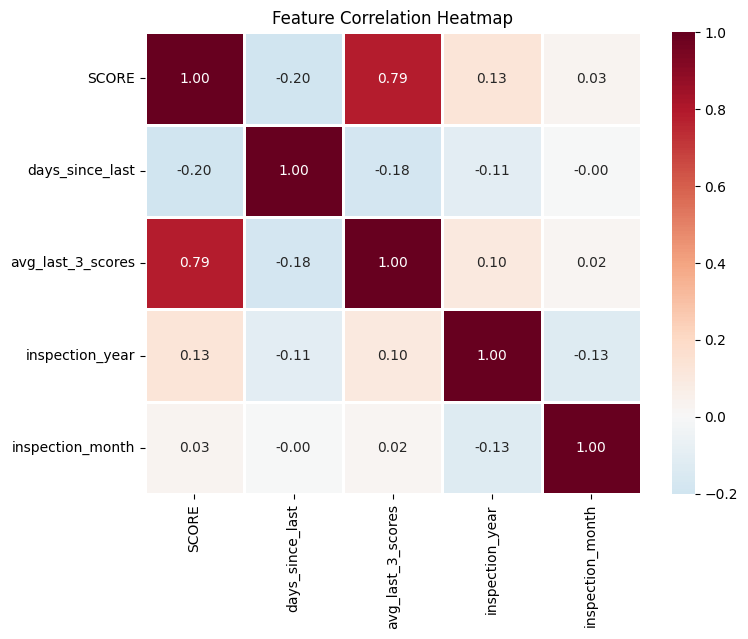

In [5]:
cols_to_corr = ['SCORE', 'days_since_last', 'avg_last_3_scores', 'inspection_year', 'inspection_month']
corr_matrix = df[cols_to_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f', linewidths=1)
plt.title('Feature Correlation Heatmap')
plt.show()

The correlation coefficient between `SCORE` and `avg_last_3_scores` is greater than 0.6, which explains why it can predict `SCORE` well and **$R^2$** can reach 0.8